# The ultimate Soccer database for data analysis and machine learning

What is Given:

   - 25,000 matches
   -  +10,000 players
   -  11 European Countries with their lead championship
   -  Seasons 2008 to 2016
   -  Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
   -  Team line up with squad formation (X, Y coordinates)
   -  Betting odds from up to 10 providers
   -  Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches
  


****
# My goal

- Finding Top Players from 2008 to 2016
- Finding Top Teams from 2008 to 2016



# Loading packages and data
****

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import datetime as dt


# Importing the dataset
conn = sqlite3.connect('../input/database.sqlite')

In [2]:
#Making a Connection for execution of SQL Commands
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#list of all the tables in the schema 
print(cursor.fetchall())

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


## Creating all the DataFrames from tables present in the DataBase

In [3]:
#making DataFrame from DataBase
df_league = pd.read_sql_query("select * from League;", conn)
df_league.head()
df_player_attributes = pd.read_sql_query("select * from Player_Attributes;", conn)
df_player = pd.read_sql_query("select * from Player;", conn)
df_match = pd.read_sql_query("select * from Match;", conn)
df_country = pd.read_sql_query("select * from Country;", conn)
df_team_attributes = pd.read_sql_query("select * from Team_Attributes;", conn)
df_team = pd.read_sql_query("select * from Team;", conn)

In [4]:
#inspecting the Player_Attributes table
df_player_attributes.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [5]:
#inspecting the Player table
df_player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [6]:
#inspecting the Country table
df_country.head(1)

,id,name
0,1,Belgium


In [7]:
#inspecting the Team_Attributes table
df_team_attributes.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [8]:
#inspecting the Team table
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [9]:
#inspecting the Match table
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


 # Database Schema
 
![database-diagram.jpeg](https://raw.githubusercontent.com/abhiksark/UD-ND/master/football_analysis/database-diagram.jpeg)

This is a complex DataBase Having Many Columns. To crearly Understand the database
I created the above DataBase Schema E-R Diagram using [Schemacrawler](https://www.schemacrawler.com/). It's a free open source tool for making E-R Diagrams from the Database. You can visit their github page for more Information.

E-R Diagram gives a indepth look into the Database and It's Structure.

# Cleaning Data
## Checking NULL Data and taking filtering the fields that are being used 



In [10]:
df_match.isna().sum()
df_match = df_match[['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5','home_player_6', 'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2','away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10','away_player_11']]
df_match.isna().sum()


country_id             0
league_id              0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_player_1       1224
home_player_2       1315
home_player_3       1281
home_player_4       1323
home_player_5       1316
home_player_6       1325
home_player_7       1227
home_player_8       1309
home_player_9       1273
home_player_10      1436
home_player_11      1555
away_player_1       1234
away_player_2       1278
away_player_3       1293
away_player_4       1321
away_player_5       1335
away_player_6       1313
away_player_7       1235
away_player_8       1341
away_player_9       1328
away_player_10      1441
away_player_11      1554
dtype: int64

From the E-R Diagram above we can see that **player_api_id** is not directly realted with the **team_api_id**.
To relate them together we will use the **Match** Table .
As, there are a total of 22 mapping from **Player->Team** so I will drop them later. 

In [11]:
df_team_attributes = df_team_attributes[['id', 'team_api_id', 'date']]
df_team_attributes.isna().sum()

id             0
team_api_id    0
date           0
dtype: int64

In [12]:
df_team.isna().sum()
df_team = df_team[['id', 'team_api_id', 'team_long_name']]
df_team.isna().sum()

id                0
team_api_id       0
team_long_name    0
dtype: int64

In [13]:
df_player.isna().sum()
df_player = df_player[['player_api_id', 'player_name' ]]

In [14]:
df_player_attributes = df_player_attributes[[ 'player_api_id', 'date', 'overall_rating','potential']]
df_player_attributes.isna().sum()

player_api_id       0
date                0
overall_rating    836
potential         836
dtype: int64

As we will rating the player on the basis of overall_rating. We will be dropping all the NULLs present in the overall_rating column from the DataFrame.

In [15]:
df_player_attributes = df_player_attributes.dropna()
df_player_attributes.isna().sum()

player_api_id     0
date              0
overall_rating    0
potential         0
dtype: int64

In [16]:
df_player.head(1)

,player_api_id,player_name
0,505942,Aaron Appindangoye


In [17]:
df_player_attributes.head(1) 

,player_api_id,date,overall_rating,potential
0,505942,2016-02-18 00:00:00,67.0,71.0


## Combining DataFrames to Have Player Name and Player attributes in a Single Data Frame

In [18]:
#Merging Two Tables
df_comb_player =  pd.merge(df_player, df_player_attributes, on="player_api_id")
df_comb_player.head(1)

,player_api_id,player_name,date,overall_rating,potential
0,505942,Aaron Appindangoye,2016-02-18 00:00:00,67.0,71.0


In [19]:
#converting Object to DateTime so we can run the Date Queries using DateTime
df_comb_player['date'] = pd.to_datetime(df_comb_player['date'])

# Finding Top Players

The First Task was to find the top 10(n) players at the end of the year. 
In the given dataset we are given mutiple attributes column for the same player with a different Dates. To keep things simple we will use only the Last Updated Attribute of the player for that year.

### Steps for finding the Top 10 Player
    1) Filtering the players by year 
    2) Taking the last updated intance of the player attributes of that year
    3) Sorting the Players by overall_rating column, if overall_rating for any two player is same we will consider the potential column.
    4) Returning the top 10 values from the sorted DataFrame.

In [20]:
def top_N_players(df,year,n=10):
    """Function which return N Number of Top Player at end of Year"""
    df_top = df[df['date'].dt.year == year]
    df_top = df_top.sort_values('date').groupby('player_api_id').last() #Taking only last Instance
    df_top = df_top.sort_values(['overall_rating','potential']).tail(n)
    df_top = df_top.sort_values(['overall_rating','potential'],ascending=False)
    return df_top

### Top 10 Players from 2008-2016 on the Basis of given Data

In [87]:
df = top_N_players(df_comb_player,2016)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank1"},inplace=True)
df_rank =df[:5]
df

,rank1,player_api_id,player_name
0,1,19533,Neymar
1,2,27299,Manuel Neuer
2,3,30834,Arjen Robben
3,4,107417,Eden Hazard
4,5,36378,Mesut Oezil
5,6,93447,Robert Lewandowski
6,7,37412,Sergio Aguero
7,8,164684,James Rodriguez
8,9,182917,David De Gea
9,10,95078,Toni Kroos


In [88]:
df = top_N_players(df_comb_player,2015)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank2"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank2,player_api_id,player_name
0,1,30981,Lionel Messi
1,2,30893,Cristiano Ronaldo
2,3,27299,Manuel Neuer
3,4,30834,Arjen Robben
4,5,40636,Luis Suarez
5,6,19533,Neymar
6,7,107417,Eden Hazard
7,8,35724,Zlatan Ibrahimovic
8,9,37459,David Silva
9,10,80562,Thiago Silva


In [89]:

df = top_N_players(df_comb_player,2014)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank3"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank3,player_api_id,player_name
0,1,30981,Lionel Messi
1,2,30893,Cristiano Ronaldo
2,3,27299,Manuel Neuer
3,4,30834,Arjen Robben
4,5,35724,Zlatan Ibrahimovic
5,6,40636,Luis Suarez
6,7,30955,Andres Iniesta
7,8,107417,Eden Hazard
8,9,30872,Bastian Schweinsteiger
9,10,30924,Franck Ribery


In [90]:

df = top_N_players(df_comb_player,2013)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank4"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank4,player_api_id,player_name
0,1,30981,Lionel Messi
1,2,30893,Cristiano Ronaldo
2,3,22543,Radamel Falcao
3,4,30924,Franck Ribery
4,5,30955,Andres Iniesta
5,6,30843,Robin van Persie
6,7,35724,Zlatan Ibrahimovic
7,8,39854,Xavi Hernandez
8,9,30872,Bastian Schweinsteiger
9,10,80562,Thiago Silva


In [91]:

df = top_N_players(df_comb_player,2012)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank5"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank5,player_api_id,player_name
0,1,30981,Lionel Messi
1,2,30893,Cristiano Ronaldo
2,3,30955,Andres Iniesta
3,4,30924,Franck Ribery
4,5,39854,Xavi Hernandez
5,6,30829,Wayne Rooney
6,7,30657,Iker Casillas
7,8,30865,Nemanja Vidic
8,9,37459,David Silva
9,10,30834,Arjen Robben


In [92]:

df = top_N_players(df_comb_player,2011)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank6"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank6,player_api_id,player_name
0,1,30981,Lionel Messi
1,2,30893,Cristiano Ronaldo
2,3,39854,Xavi Hernandez
3,4,30955,Andres Iniesta
4,5,30829,Wayne Rooney
5,6,30834,Arjen Robben
6,7,30657,Iker Casillas
7,8,30865,Nemanja Vidic
8,9,37482,Gerard Pique
9,10,30878,Wesley Sneijder


In [93]:

df = top_N_players(df_comb_player,2010)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank7"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank7,player_api_id,player_name
0,1,30981,Lionel Messi
1,2,30893,Cristiano Ronaldo
2,3,30657,Iker Casillas
3,4,30909,David Villa
4,5,30829,Wayne Rooney
5,6,30822,Didier Drogba
6,7,30661,Carles Puyol
7,8,30865,Nemanja Vidic
8,9,30955,Andres Iniesta
9,10,39854,Xavi Hernandez


In [94]:

df = top_N_players(df_comb_player,2009)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank8"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank8,player_api_id,player_name
0,1,30981,Lionel Messi
1,2,30657,Iker Casillas
2,3,30893,Cristiano Ronaldo
3,4,30989,Julio Cesar
4,5,30717,Gianluigi Buffon
5,6,30924,Franck Ribery
6,7,41044,Kaka
7,8,30618,Steven Gerrard
8,9,30853,Fernando Torres
9,10,35724,Zlatan Ibrahimovic


In [95]:

df = top_N_players(df_comb_player,2008)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank9"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank9,player_api_id,player_name
0,1,30893,Cristiano Ronaldo
1,2,30657,Iker Casillas
2,3,30981,Lionel Messi
3,4,30717,Gianluigi Buffon
4,5,41044,Kaka
5,6,35724,Zlatan Ibrahimovic
6,7,30924,Franck Ribery
7,8,30613,Cesc Fabregas
8,9,30723,Alessandro Nesta
9,10,30859,Petr Cech


In [96]:

df = top_N_players(df_comb_player,2007)[['player_name']]
df.reset_index(level=0, inplace=True)
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank10"},inplace=True)
df_rank = pd.merge(df_rank,df[:5],on=["player_api_id","player_name"],how='outer')
df

,rank10,player_api_id,player_name
0,1,30893,Cristiano Ronaldo
1,2,30717,Gianluigi Buffon
2,3,30743,Ronaldinho
3,4,30723,Alessandro Nesta
4,5,30626,Thierry Henry
5,6,30627,John Terry
6,7,30829,Wayne Rooney
7,8,41044,Kaka
8,9,30909,David Villa
9,10,30657,Iker Casillas


After getting all the ranks of the players. Our Next task is to visualize the players year by year performance in a line plot. 

To make a line plot we will need to change the DataFrame according to the format accepted by df.plot() function.
We will only make Line Plot of top 15 Players who have been consistent throughout the years. 

In [97]:
#Making a Line Plot of top 15 Players
df_rank.index = df_rank.player_name
#Taking only the rank in consideration
df_rank = df_rank[[ 'rank1', 'rank2','rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9','rank10']]

In [98]:
df_rank = df_rank.replace(np.NaN,6) # Replacing the NaNs with 11 to better represent the graph
df_rank['sum_rank'] = df_rank[[ 'rank1', 'rank2','rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8', 'rank9','rank10']].sum(axis=1)

In [99]:
df_rank =  df_rank.sort_values('sum_rank').head(10) #sorting and taking only top 15 values 
thickness = df_rank.sum_rank
df_rank  = df_rank.drop('sum_rank',axis=1)
df1_transposed = df_rank.T

In [100]:
df1_transposed

player_name,Lionel Messi,Cristiano Ronaldo,Iker Casillas,Manuel Neuer,Arjen Robben,Gianluigi Buffon,Andres Iniesta,Neymar,Xavi Hernandez,Franck Ribery
rank1,6.0,6.0,6.0,2.0,3.0,6.0,6.0,1.0,6.0,6.0
rank2,1.0,2.0,6.0,3.0,4.0,6.0,6.0,6.0,6.0,6.0
rank3,1.0,2.0,6.0,3.0,4.0,6.0,6.0,6.0,6.0,6.0
rank4,1.0,2.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,4.0
rank5,1.0,2.0,6.0,6.0,6.0,6.0,3.0,6.0,5.0,4.0
rank6,1.0,2.0,6.0,6.0,6.0,6.0,4.0,6.0,3.0,6.0
rank7,1.0,2.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
rank8,1.0,3.0,2.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0
rank9,3.0,1.0,2.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0
rank10,6.0,1.0,6.0,6.0,6.0,2.0,6.0,6.0,6.0,6.0


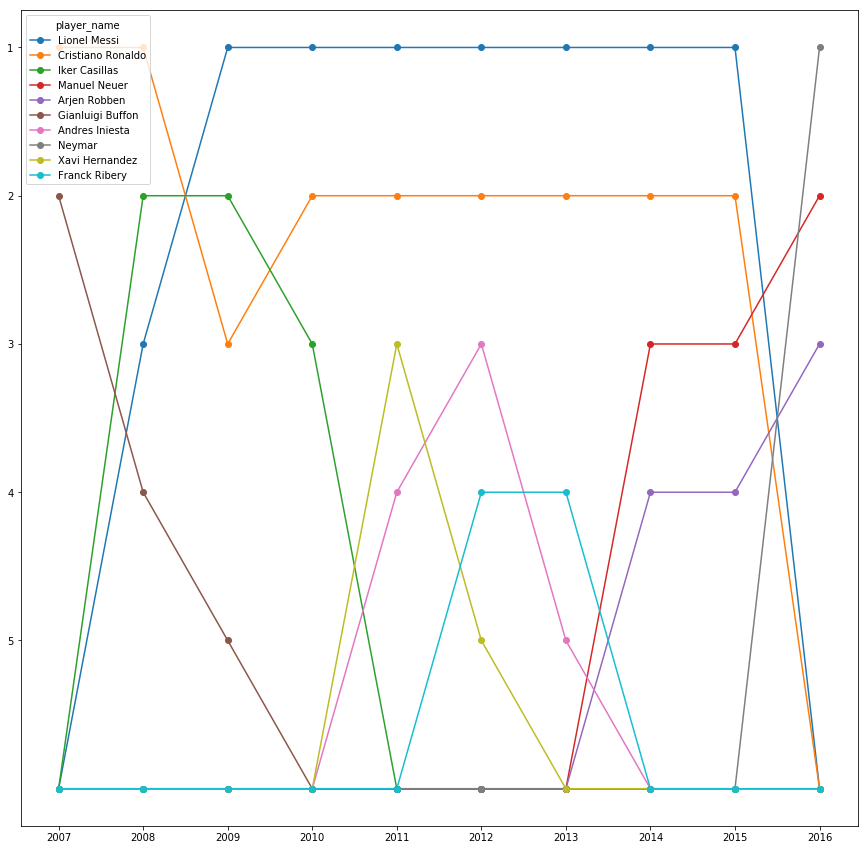

In [105]:
df1_transposed.plot(kind='line',figsize=(15,15), marker='o')
plt.gca().invert_yaxis() #inverting y axis
plt.gca().invert_xaxis() #inverting y axis
plt.yticks(range(1,6))
ind = np.arange(10) 
plt.xticks(ind, ("2016","2015","2014","2013","2012","2011","2010","2009","2008","2007"))
plt.show();

# Finding Top Teams 

## League Teams 

In [36]:
df_comb_team = pd.merge(df_team, df_team_attributes, on="team_api_id")
df_comb_team.head(1)

,id_x,team_api_id,team_long_name,id_y,date
0,1,9987,KRC Genk,485,2010-02-22 00:00:00


In [37]:
df_comb_team['date'] = pd.to_datetime(df_comb_team['date'])

In [38]:
df_comb_team_2015 = df_comb_team[df_comb_team['date'].dt.year == 2015]
df_comb_team_2015 = df_comb_team_2015.sort_values('date').groupby('team_api_id').last()

In [39]:
df_comb_team_2015.head()

,id_x,team_long_name,id_y,date
team_api_id,,,,
1601,31446,Ruch Chorzów,1118,2015-09-10
1957,31456,Jagiellonia Białystok,624,2015-09-10
2182,31453,Lech Poznań,700,2015-09-10
2186,31458,Cracovia,335,2015-09-10
4087,11822,Évian Thonon Gaillard FC,415,2015-09-10


In [40]:
# making the fuctions

def end_of_year_player(df_comb_player,year):
    df_comb_player['date'] = pd.to_datetime(df_comb_player['date'])
    df_comb_player = df_comb_player[df_comb_player['date'].dt.year == year]
    df_comb_player = df_comb_player.sort_values('date').groupby('player_api_id').last()    
    df_comb_player.reset_index(level=0, inplace=True)
    return df_comb_player[['player_api_id','player_name', 'date', 'overall_rating', 'potential']]


def end_of_year_team(df_comb_team):
    df_comb_team = df_comb_team.sort_values('date').groupby('team_api_id').last()
    df_comb_team.reset_index(level=0, inplace=True)
    return df_comb_team[['team_api_id','team_long_name','date']]


def team_to_player_home(df_match,year):
    players_list_home = ['date','home_team_api_id','home_player_1', 'home_player_2', 'home_player_3',
   'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
   'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11']
    df_match = df_match.loc[:,players_list_home]
    df_match['date'] = pd.to_datetime(df_match['date'])
    df_match = df_match[df_match['date'].dt.year == year]
    df_match = df_match.drop(['date'],axis=1)
    df_team_to_player=df_match.melt(['home_team_api_id']).sort_values('home_team_api_id')
    df_team_to_player = df_team_to_player[["home_team_api_id","value"]]
    df_team_to_player.rename( columns={"value":"player_api_id", "home_team_api_id":"team_api_id" },inplace=True)
    df_team_to_player = df_team_to_player.drop_duplicates()
    df_team_to_player = df_team_to_player.dropna()
    return df_team_to_player

def team_to_player_away(df_match,year):
    players_list_away = [ 'date','away_team_api_id','away_player_1', 'away_player_2','away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10','away_player_11']
    df_match = df_match.loc[:,players_list_away]
    df_match['date'] = pd.to_datetime(df_match['date'])
    df_match = df_match[df_match['date'].dt.year == year]
    df_match = df_match.drop(['date'],axis=1)
    df_team_to_player=df_match.melt(['away_team_api_id']).sort_values('away_team_api_id')
    df_team_to_player = df_team_to_player[["away_team_api_id","value"]]
    df_team_to_player.rename( columns={"value":"player_api_id", "away_team_api_id":"team_api_id" },inplace=True)
    df_team_to_player = df_team_to_player.drop_duplicates()
    df_team_to_player = df_team_to_player.dropna()
    return df_team_to_player

def team_to_player(df_match,year):    
    df_2 = team_to_player_home(df_match,year)
    df_1 = team_to_player_away(df_match,year)
    df_combined = [df_1,df_2]
    result = pd.concat(df_combined)
    result = result.drop_duplicates()
    return result
    
def top_N_team(df_comb_team,df_comb_player,df_match,season="2015/2016",n=5):
    year = int(season.split("/")[0])
    df_end_of_year_team = end_of_year_team(df_comb_team)
    df_end_of_year_player = end_of_year_player(df_comb_player,year)
    df_team_to_player = team_to_player(df_match,year)
    df_end_of_year_player = pd.merge(df_end_of_year_player, df_team_to_player, on="player_api_id")
    df_comb_player_team_group= df_end_of_year_player.sort_values('overall_rating').groupby('team_api_id').head(16)
    df_comb_player_team_group = df_comb_player_team_group.sort_values('overall_rating').groupby('team_api_id').sum()
    df_top = pd.merge(df_comb_player_team_group,df_end_of_year_team,on="team_api_id")
    df_top = df_top[["team_api_id","overall_rating","team_long_name"]]
    df_top = df_top.sort_values("overall_rating")
    df_top = df_top[-n:]
    df_top = df_top.sort_values("overall_rating",ascending=False)
    return df_top

In [41]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2015/2016")
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank1"},inplace=True)
df_rank = df
df

,rank1,team_api_id,overall_rating,team_long_name
0,1,8634,1272.0,FC Barcelona
1,2,8633,1267.0,Real Madrid CF
2,3,8455,1264.0,Chelsea
3,4,8456,1263.0,Manchester City
4,5,9906,1262.0,Atlético Madrid


In [42]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2014/2015")
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank2"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank2,team_api_id,overall_rating,team_long_name
0,1,8633,1273.0,Real Madrid CF
1,2,8455,1265.0,Chelsea
2,3,8634,1260.0,FC Barcelona
3,4,8456,1239.0,Manchester City
4,5,9847,1230.0,Paris Saint-Germain


In [43]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2013/2014")
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank3"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank3,team_api_id,overall_rating,team_long_name
0,1,8634,1277.0,FC Barcelona
1,2,9823,1270.0,FC Bayern Munich
2,3,8456,1259.0,Manchester City
3,4,8455,1250.0,Chelsea
4,5,8633,1234.0,Real Madrid CF


In [44]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2012/2013")
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank4"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank4,team_api_id,overall_rating,team_long_name
0,1,8633,1265.0,Real Madrid CF
1,2,8634,1248.0,FC Barcelona
2,3,8456,1245.0,Manchester City
3,4,9885,1242.0,Juventus
4,5,9823,1238.0,FC Bayern Munich


In [45]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2011/2012")
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank5"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank5,team_api_id,overall_rating,team_long_name
0,1,8456,1254.0,Manchester City
1,2,8455,1252.0,Chelsea
2,3,8633,1237.0,Real Madrid CF
3,4,10260,1217.0,Manchester United
4,5,8586,1216.0,Tottenham Hotspur


In [46]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2010/2011")
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank6"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank6,team_api_id,overall_rating,team_long_name
0,1,8633,1281.0,Real Madrid CF
1,2,8634,1262.0,FC Barcelona
2,3,8455,1257.0,Chelsea
3,4,8636,1242.0,Inter
4,5,10260,1239.0,Manchester United


In [47]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2009/2010")
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank7"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank7,team_api_id,overall_rating,team_long_name
0,1,8455,1275.0,Chelsea
1,2,8636,1243.0,Inter
2,3,8633,1239.0,Real Madrid CF
3,4,8634,1235.0,FC Barcelona
4,5,9885,1227.0,Juventus


In [48]:
df = top_N_team(df_comb_team,df_comb_player,df_match,season="2008/2009")
df.index = range(1,len(df.index)+1)
df.reset_index(level=0, inplace=True)
df.rename( columns={"index":"rank8"},inplace=True)
df_rank = pd.merge(df_rank,df,on=["team_api_id","team_long_name"],how='outer')
df

,rank8,team_api_id,overall_rating,team_long_name
0,1,8455,1306.0,Chelsea
1,2,8636,1282.0,Inter
2,3,8564,1277.0,Milan
3,4,10260,1276.0,Manchester United
4,5,8686,1266.0,Roma


In [49]:
df_rank = df_rank.replace(np.NaN,6)
df_rank.index = df_rank.team_long_name
df_rank = df_rank[[ 'rank1', 'rank2',
       'rank3', 'rank4', 'rank5', 'rank6', 'rank7', 'rank8']]

In [50]:
#df.pivot(index = "team_long_name")
df1_transposed = df_rank.T

In [51]:
df1_transposed

team_long_name,FC Barcelona,Real Madrid CF,Chelsea,Manchester City,Atlético Madrid,Paris Saint-Germain,FC Bayern Munich,Juventus,Manchester United,Tottenham Hotspur,Inter,Milan,Roma
rank1,1.0,2.0,3.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
rank2,3.0,1.0,2.0,4.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
rank3,1.0,5.0,4.0,3.0,6.0,6.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0
rank4,2.0,1.0,6.0,3.0,6.0,6.0,5.0,4.0,6.0,6.0,6.0,6.0,6.0
rank5,6.0,3.0,2.0,1.0,6.0,6.0,6.0,6.0,4.0,5.0,6.0,6.0,6.0
rank6,2.0,1.0,3.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,4.0,6.0,6.0
rank7,4.0,3.0,1.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,2.0,6.0,6.0
rank8,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,4.0,6.0,2.0,3.0,5.0


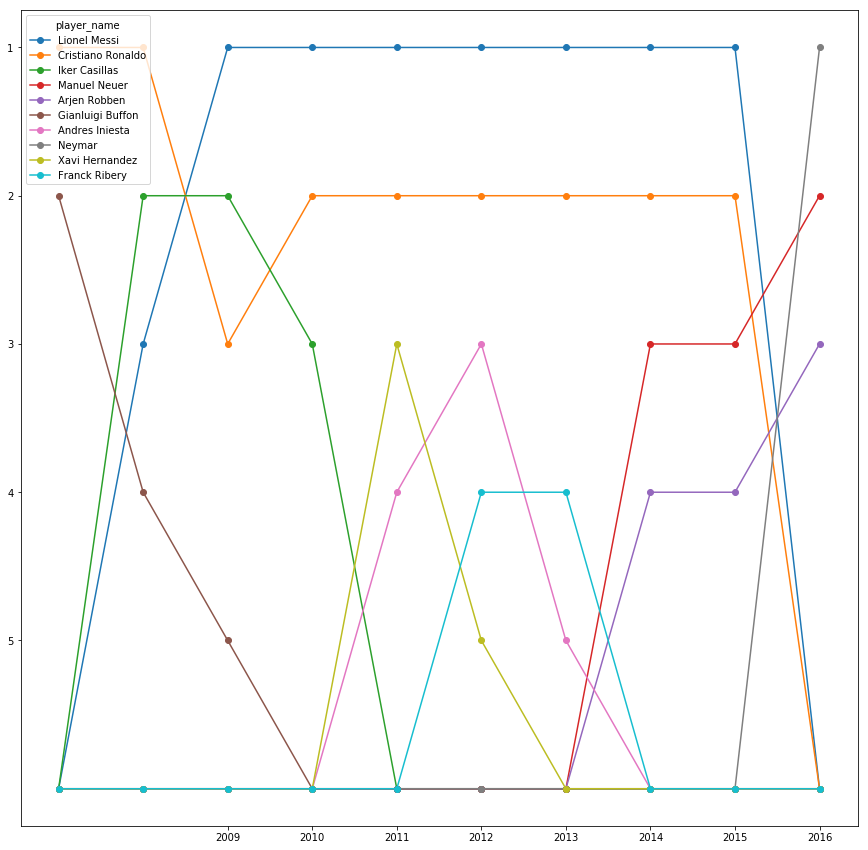

In [106]:
df1_transposed.plot(kind='line',figsize=(15,15), marker='o')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.yticks(range(1,6))
ind = np.arange(8) 
plt.xticks(ind, ("2016","2015","2014","2013","2012","2011","2010","2009"))
plt.show();




Please upvote this kernel. This is still on Progress. Your comments on how we can improve this kernel is welcome. Thanks.


In [53]:
def league_to_team(df_match,year):
    df_match = df_match.loc[:,["date","league_id","home_team_api_id","away_team_api_id"]]
    df_match['date'] = pd.to_datetime(df_match['date'])
    df_match = df_match[df_match['date'].dt.year == year]
    df_match = df_match.drop('date',axis=1)
    df_match=df_match.melt(['league_id'])
    df_match = df_match.drop('variable',axis=1)
    df_match.rename( columns={"value":"team_api_id" },inplace=True)
    df_match = df_match.drop_duplicates()
    return df_match


In [54]:
def top_leagues(df_comb_team,df_comb_player,df_match,season="2015/2016"):
    year = int(season.split("/")[0])
    df_end_of_year_team = end_of_year_team(df_comb_team)
    df_end_of_year_player = end_of_year_player(df_comb_player,year)
    df_team_to_player = team_to_player(df_match,year)
    df_end_of_year_player = pd.merge(df_end_of_year_player, df_team_to_player, on="player_api_id")
    df_comb_player_team_group= df_end_of_year_player.sort_values('overall_rating').groupby('team_api_id').head(16)
    df_comb_player_team_group = df_comb_player_team_group.sort_values('overall_rating').groupby('team_api_id').sum()
    df_top = pd.merge(df_comb_player_team_group,df_end_of_year_team,on="team_api_id")
    df_top = df_top[["team_api_id","overall_rating","team_long_name"]]
    df_top = df_top.sort_values("overall_rating")
    df_top = df_top.sort_values("overall_rating",ascending=False)
    df_league_to_team = league_to_team(df_match,year)
    df_top = pd.merge(df_league_to_team,df_top,on="team_api_id")
    return df_top

In [55]:
df = top_leagues(df_comb_team,df_comb_player,df_match,season="2015/2016")
df = df.groupby("league_id").sum()
df.reset_index(level=0, inplace=True)
df_league.rename( columns={"id":"league_id" },inplace=True)
df = pd.merge(df,df_league,on="league_id")
df.sort_values("overall_rating")

,league_id,team_api_id,overall_rating,country_id,name
10,24558,100835,9702.0,24558,Switzerland Super League
8,19694,116853,12524.0,19694,Scotland Premier League
6,15722,115904,16607.0,15722,Poland Ekstraklasa
0,1,427067,18869.0,1,Belgium Jupiler League
7,17642,311550,19606.0,17642,Portugal Liga ZON Sagres
5,13274,185965,22464.0,13274,Netherlands Eredivisie
3,7809,181708,23075.0,7809,Germany 1. Bundesliga
2,4769,205902,25195.0,4769,France Ligue 1
4,10257,410448,26102.0,10257,Italy Serie A
9,21518,207223,26963.0,21518,Spain LIGA BBVA


In [56]:
df = top_leagues(df_comb_team,df_comb_player,df_match,season="2015/2016")
df = df.groupby("league_id").median()
df.reset_index(level=0, inplace=True)
df = pd.merge(df,df_league,on="league_id")
df_league.rename( columns={"id":"league_id" },inplace=True)
df.sort_values("overall_rating")

,league_id,team_api_id,overall_rating,country_id,name
8,19694,8597.0,957.0,19694,Scotland Premier League
10,24558,10184.5,962.5,24558,Switzerland Super League
6,15722,8025.0,987.0,15722,Poland Ekstraklasa
0,1,9985.5,1043.5,1,Belgium Jupiler League
5,13274,8640.0,1062.0,13274,Netherlands Eredivisie
7,17642,9770.0,1062.5,17642,Portugal Liga ZON Sagres
2,4769,9748.0,1096.0,4769,France Ligue 1
4,10257,8686.0,1122.0,10257,Italy Serie A
3,7809,8721.5,1147.0,7809,Germany 1. Bundesliga
1,1729,8668.0,1159.0,1729,England Premier League


In [57]:
df = top_leagues(df_comb_team,df_comb_player,df_match,season="2015/2016")
df = df.groupby("league_id").std()
df.reset_index(level=0, inplace=True)
df = pd.merge(df,df_league,on="league_id")
df_league.rename( columns={"id":"league_id" },inplace=True)
df.sort_values("overall_rating")

,league_id,team_api_id,overall_rating,country_id,name
2,4769,1446.085601,35.821307,4769,France Ligue 1
8,19694,755.435237,38.027487,19694,Scotland Premier League
0,1,62635.175074,40.814942,1,Belgium Jupiler League
1,1729,792.738903,41.776698,1729,England Premier League
3,7809,798.105546,44.121692,7809,Germany 1. Bundesliga
4,10257,41661.480168,47.149958,10257,Italy Serie A
5,13274,1263.329791,47.566945,13274,Netherlands Eredivisie
9,21518,837.096738,48.340116,21518,Spain LIGA BBVA
6,15722,2821.056227,49.125964,15722,Poland Ekstraklasa
7,17642,35156.583045,50.940052,17642,Portugal Liga ZON Sagres


In [58]:
import seaborn as sns

In [59]:
def box_plot_leagues(df_comb_team,df_comb_player,df_match,season="2014/2015"):
    df = top_leagues(df_comb_team,df_comb_player,df_match,season="2014/2015")
    df = pd.merge(df,df_league,on="league_id")
    df_league.rename( columns={"id":"league_id" },inplace=True)
    df.sort_values("overall_rating")
    plt.figure(figsize=(10,10))
    my_palette = sns.color_palette("cubehelix", 11)
    ax = sns.boxplot(x="overall_rating", y="name", data=df,palette= my_palette)
    #ax = sns.swarmplot(x="overall_rating", y="name", data=df, color ='aqua',size=4)
    #sns.boxplot(data=df,x='overall_rating',y='name')
    plt.title(season)
    plt.show()

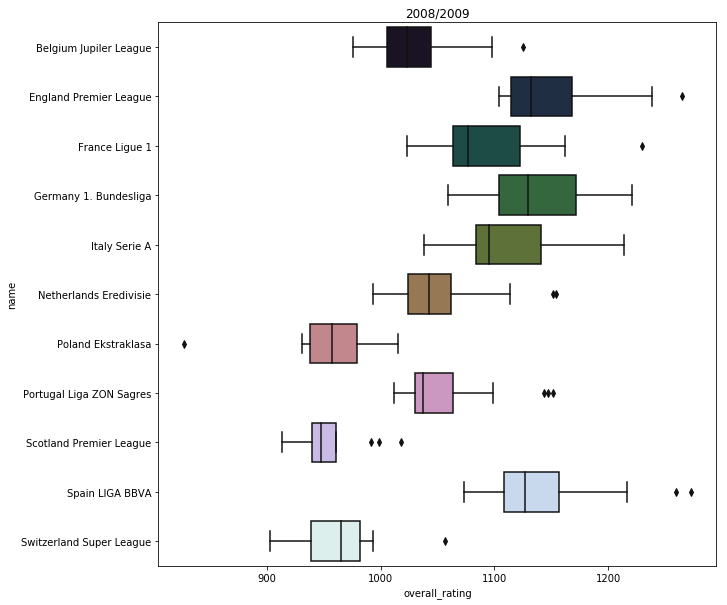

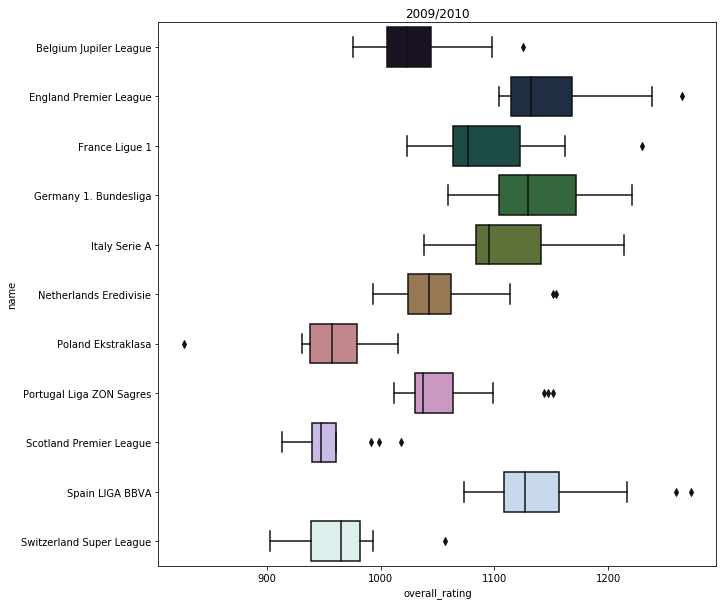

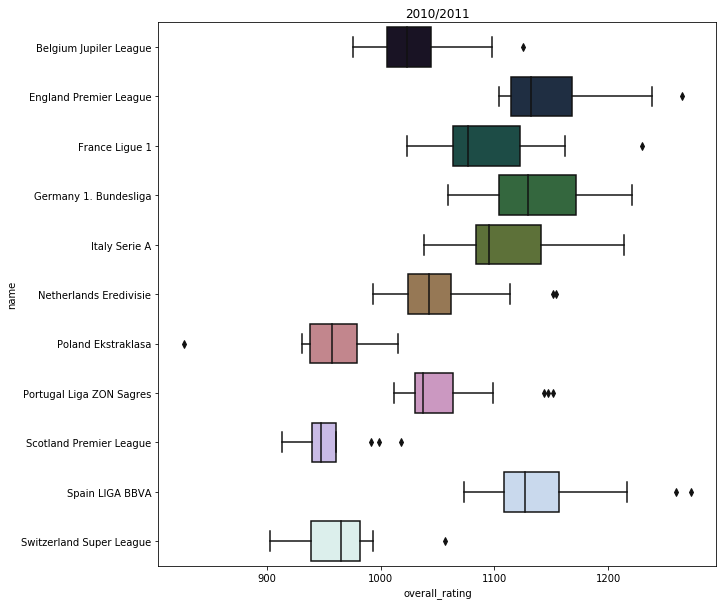

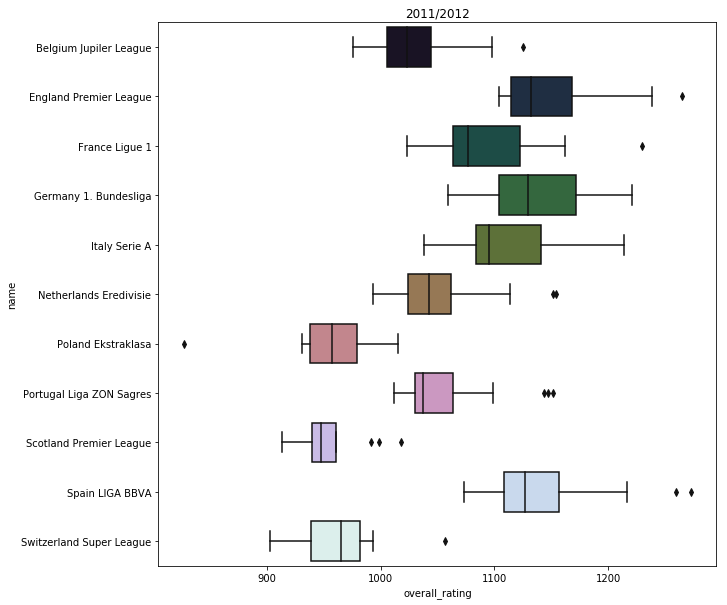

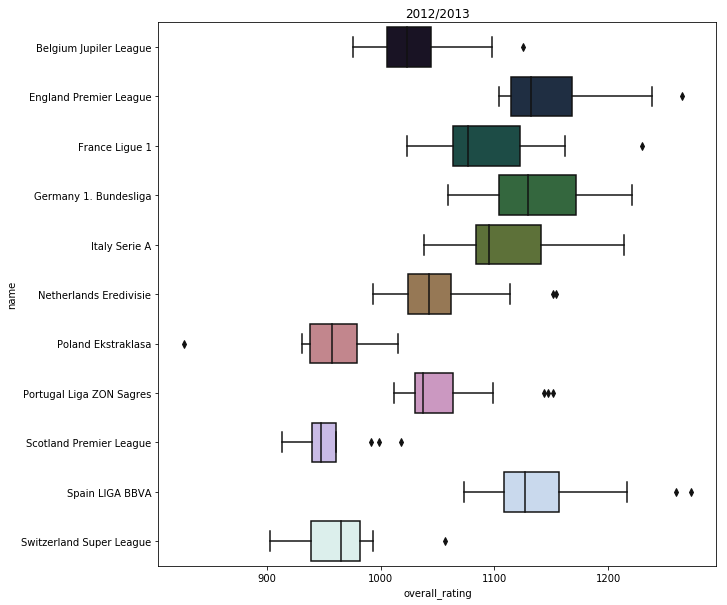

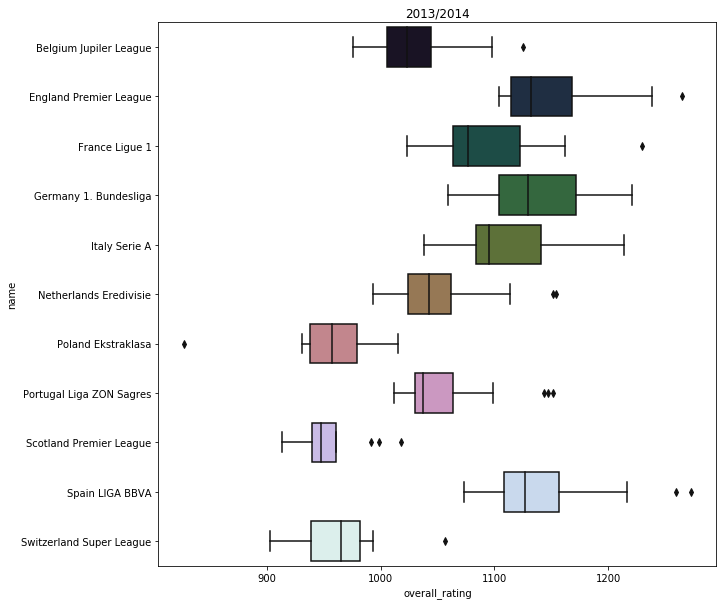

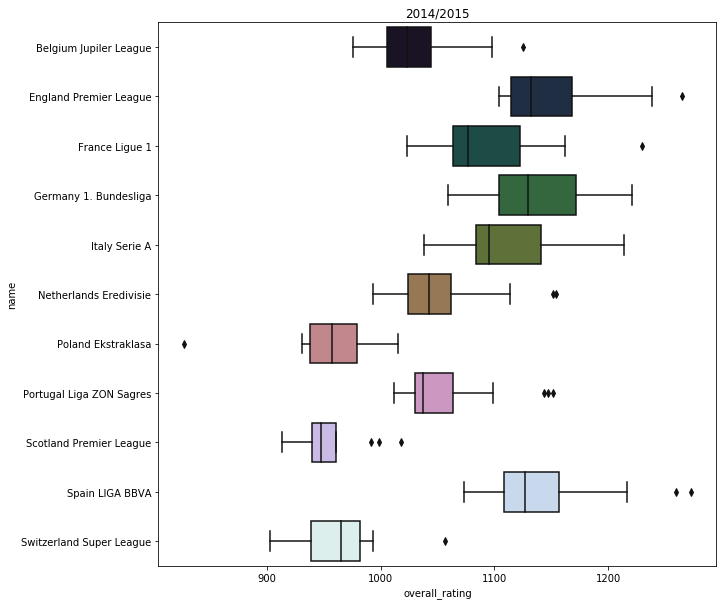

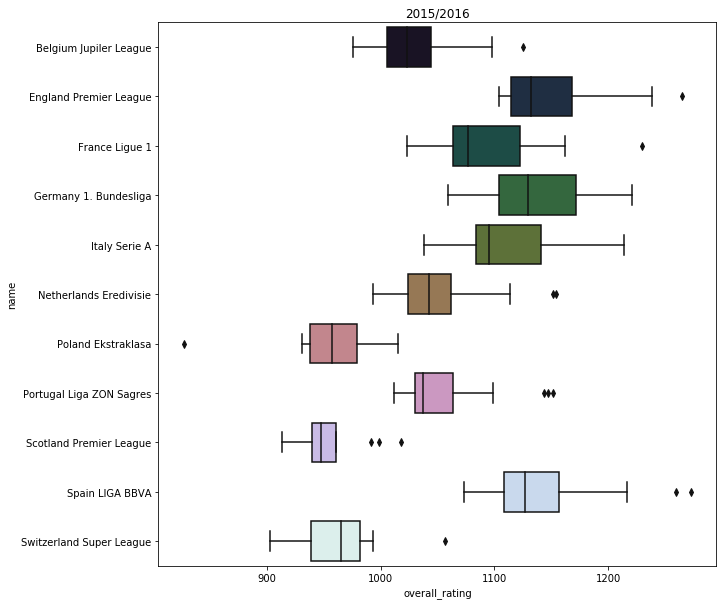

In [60]:
for i in range(2008,2016):
    season = str(i)+"/"+str(i+1)
    box_plot_leagues(df_comb_team,df_comb_player,df_match,season)

In [61]:
import random
def box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,country):
    df_plot = pd.DataFrame()
    for i in range(2008,2016):
        season = str(i)+"/"+str(i+1)
        df = top_leagues(df_comb_team,df_comb_player,df_match,season)
        df = pd.merge(df,df_league,on="league_id")
        df = df[df.name.str.contains(country)]
        df["season"] = str(season)
        df_plot = df_plot.append(df, ignore_index=True)
    plt.figure(figsize=(10,10))
    my_palette = [(random.random(),random.random(),random.random())]
    ax = sns.boxplot(x="overall_rating", y="season", data=df_plot,palette= my_palette) 
    plt.title(country)
    plt.show()

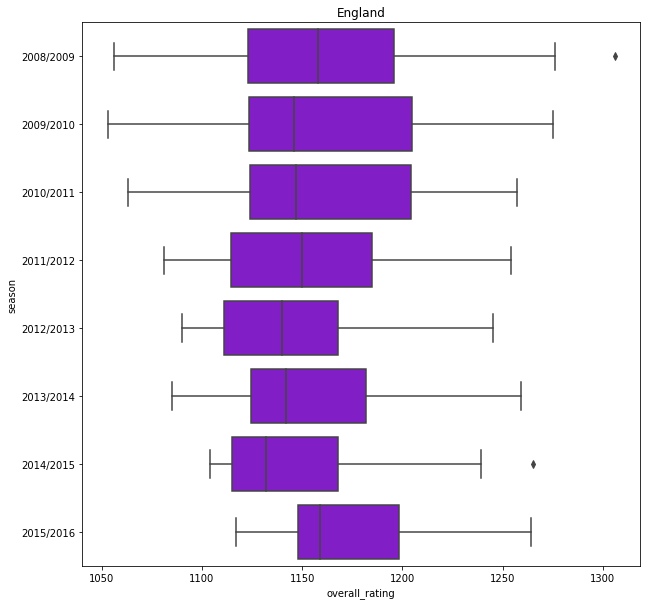

In [62]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"England")

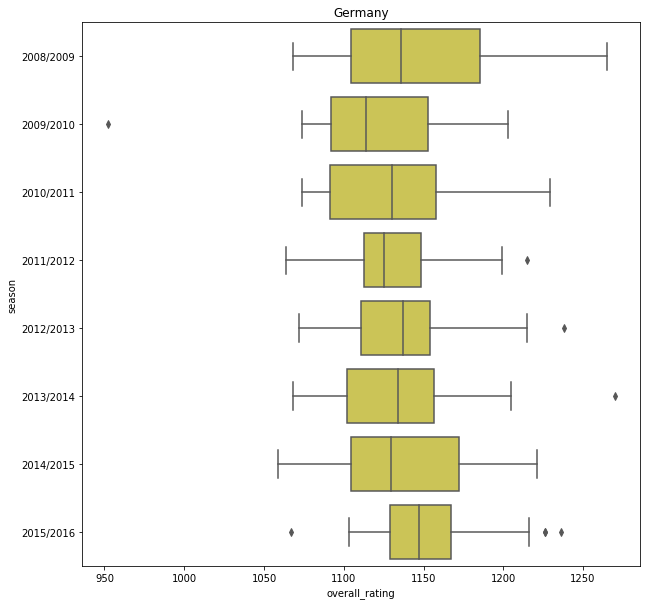

In [63]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"Germany")

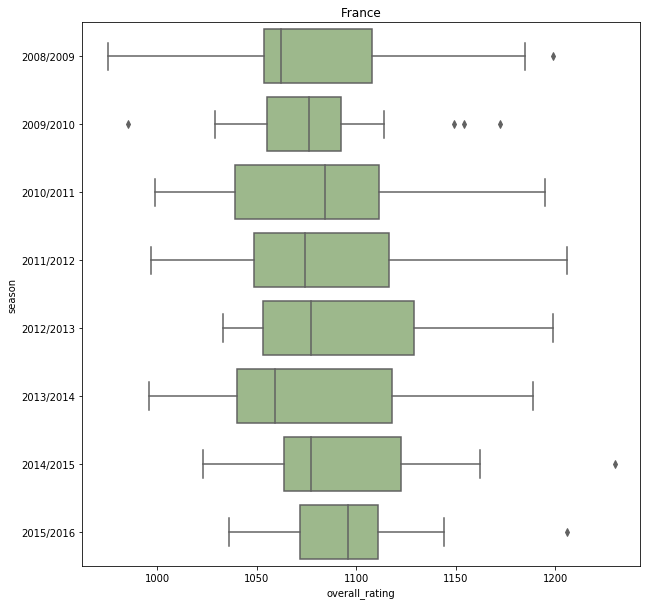

In [64]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"France")

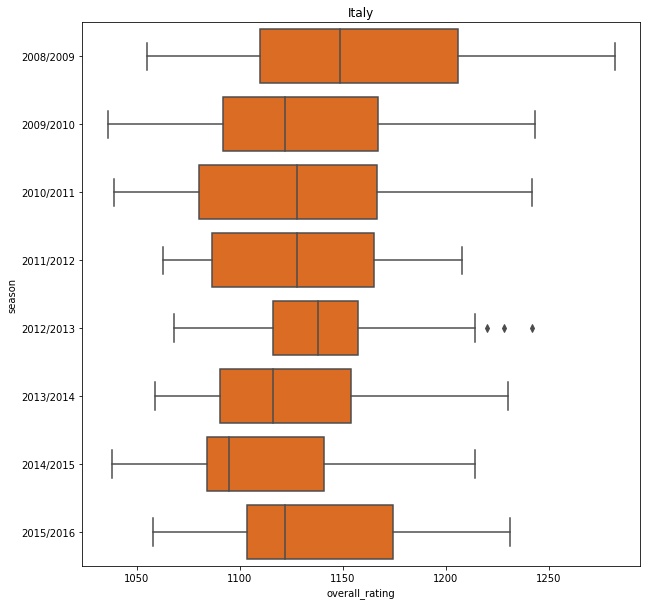

In [65]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"Italy")

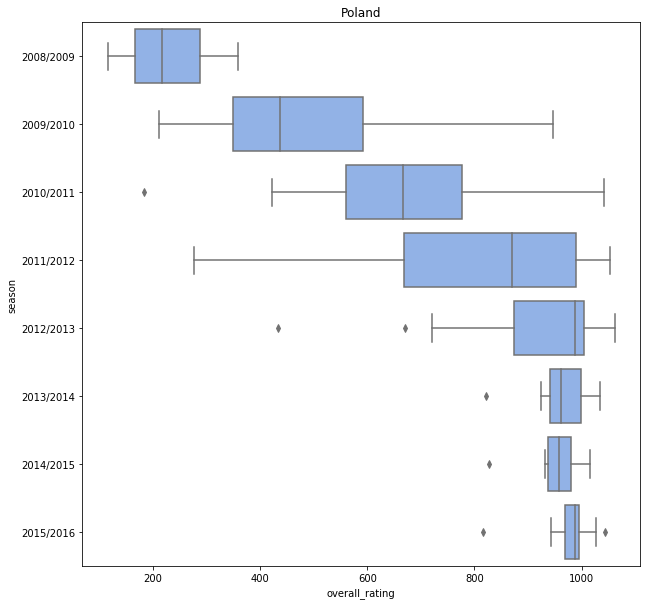

In [66]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"Poland")

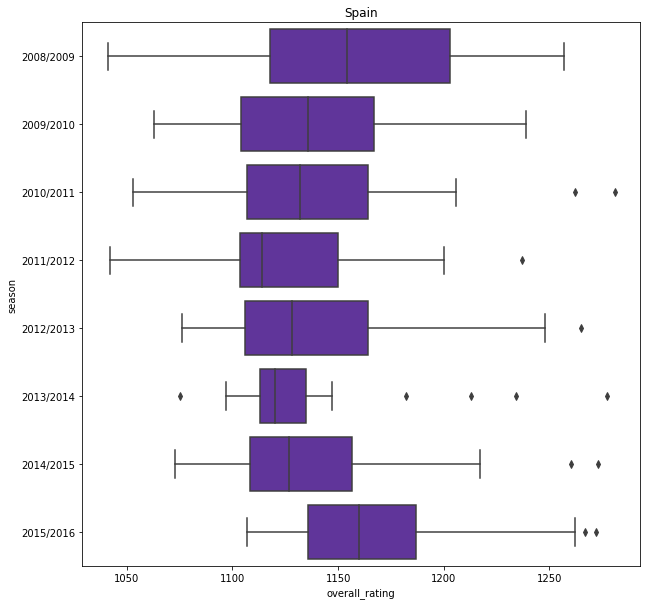

In [67]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"Spain")

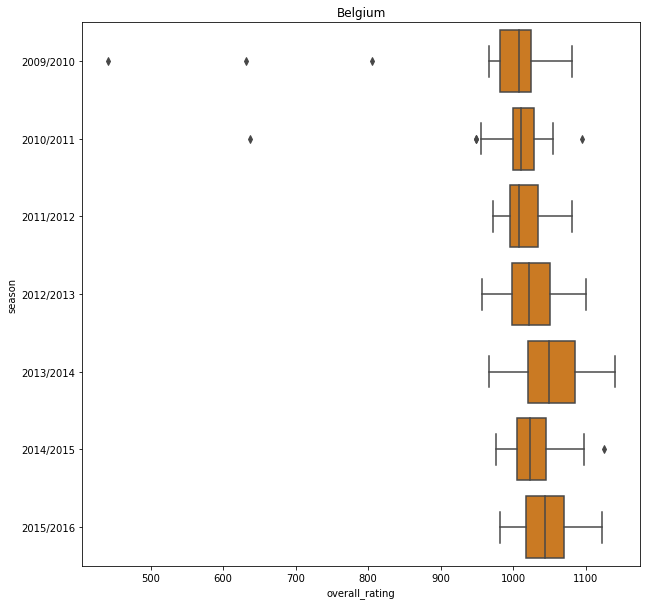

In [68]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"Belgium")

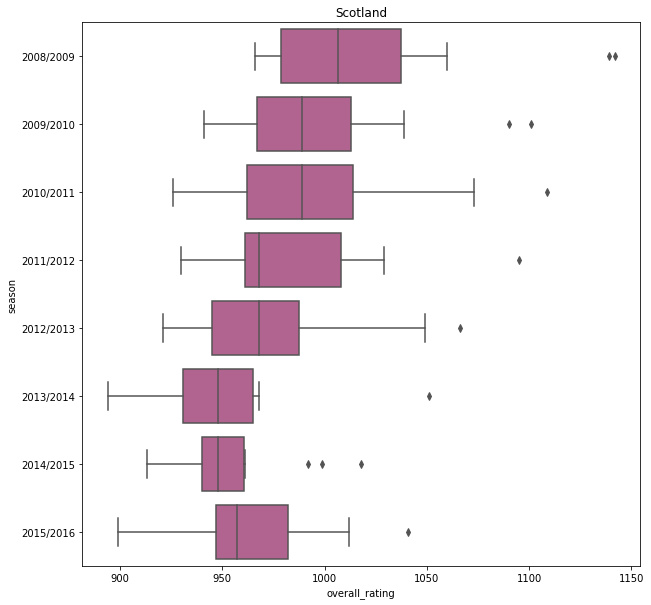

In [69]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"Scotland")

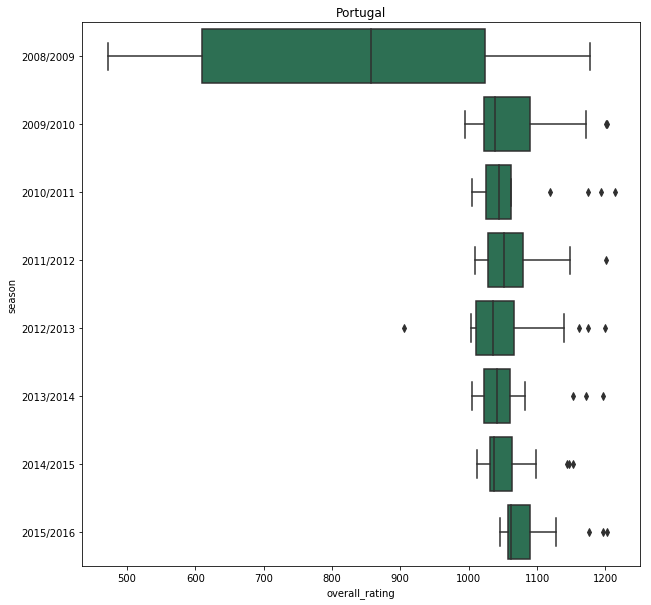

In [70]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"Portugal")

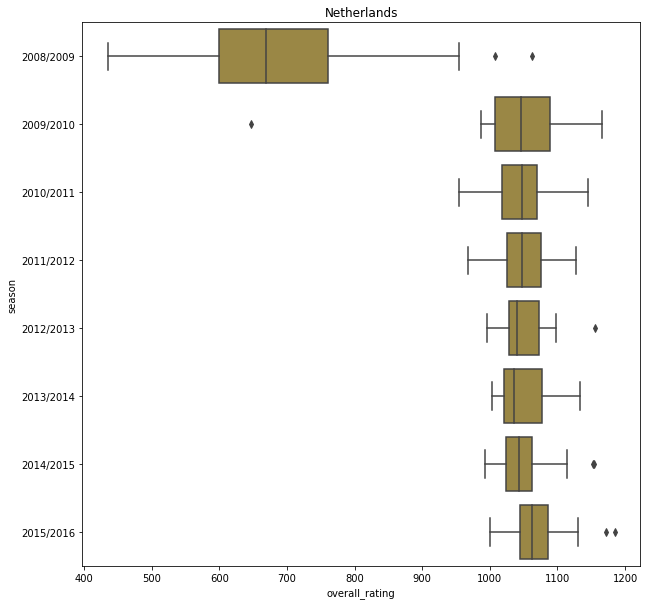

In [71]:
box_plot_leagues_through_years(df_comb_team,df_comb_player,df_match,"Netherlands")